<a href="https://colab.research.google.com/github/ElenaShargina/nnetworks/blob/main/%D0%9F%D0%BE%D0%BB%D0%BD%D0%BE%D1%81%D0%B2%D1%8F%D0%B7%D0%BD%D0%B0%D1%8F_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D0%B0%D1%8F_%D1%81%D0%B5%D1%82%D1%8C_%D0%B4%D0%BB%D1%8F_%D1%80%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B5%D0%B9_%D0%BE%D0%B4%D0%B5%D0%B6%D0%B4%D1%8B_%D0%B2_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Нейронная сеть для распознавания моделей одежды в Keras



Будет продемонстрирована работа модели без обратной связи, найден момент переобучения, работа модели с обратной связью.

## Подготовка

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
%matplotlib inline 
# Зафиксируем генератор случайных чисел
from numpy.random import seed
seed(2020)
from tensorflow.random import set_seed
set_seed(2020)

### Подготовка данных для обучения сети, их иллюстрации

**Загружаем набор данных**

In [ ]:
# (x_train, y_train) - набор данных для обучения
# (x_test, y_test) - набор данных для тестирования
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Список с названиями классов

In [ ]:
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

Просматриваем примеры 50 изображений

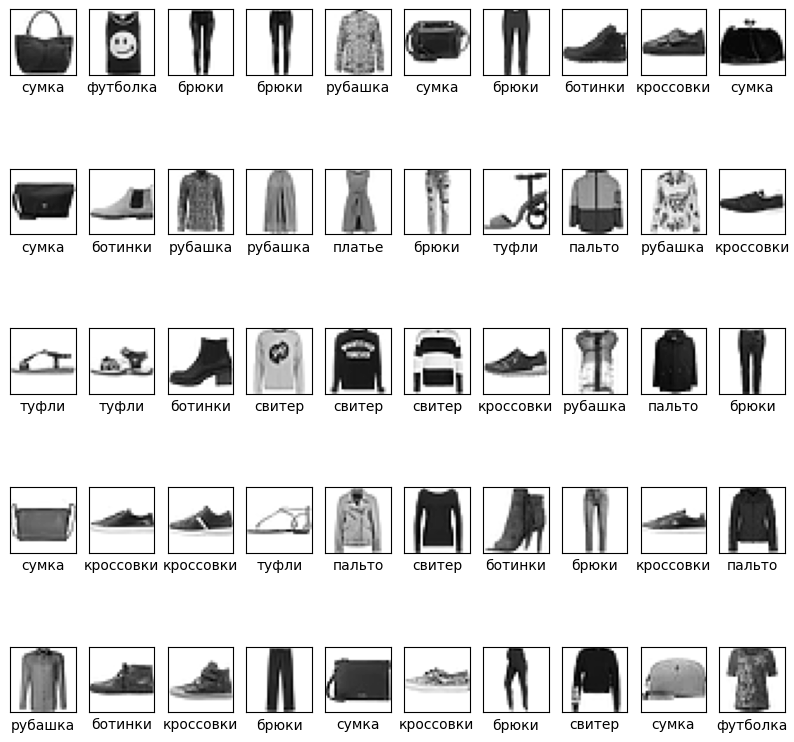

In [ ]:
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

**Преобразование размерности данных в наборе (28*28 черно-белых пикслей = 748 входных признаков)**


In [ ]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

**Нормализация данных**

In [ ]:
# нужно, чтобы значение каждого признака было от 0 до 1.
x_train = x_train / 255 
x_test = x_test / 255 

Просмотр массива с правильными ответами - "учителя". Для каждого предмета из x_train введена его правильная категория от 0 до 9

In [ ]:
# запросим предмет с номером 5
n = 5
print(y_train[n])

2


**Преобразуем метки в формат one hot encoding**

Для категории 2 из 10 возможных будет массив вида [0,0,1,0,0,0,0,0,0,0]

In [ ]:
y_train = utils.to_categorical(y_train, 10)

In [ ]:
y_test = utils.to_categorical(y_test, 10)

**Правильный ответ в формате one hot encoding**

In [ ]:
print(y_train[n])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


## Модель без обратной связи

### Создаем сеть

**Создаем последовательную модель**

функция активации для двух первых слоев будет RelU (rectified linear units)
f(x) = max(0,x)

функция активации для выходного слоя будет softmax

$f(z)_i=\frac{e^{z_i}}{\sum_{j=1}^k{e^{z_j}}}$


In [ ]:
# Создаем последовательную модель
model = Sequential()
# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(800, input_dim=784, activation="relu"))
# Второй скрытый слой
model.add(Dense(units=400, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству классов)
model.add(Dense(10, activation="softmax"))

**Компилируем сеть**

функция потерь - CrossEntropy, подходящая для небинарных классификаций

оптимизатор - adam, показавший себя на этом наборе лучше остальных

метрика - accuracy (точность)

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 800)               628000    
                                                                 
 dense_1 (Dense)             (None, 400)               320400    
                                                                 
 dense_2 (Dense)             (None, 10)                4010      
                                                                 
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


**Обучаем сеть**

validation_split=0.2 - 20% обучающих данных уйдет в проверочные данные для проверки того, не переобучилась ли сеть 

In [ ]:
history = model.fit(x_train, y_train, 
                    batch_size=200, 
                    epochs=25,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/25
240/240 [==============================] - 17s 59ms/step - loss: 0.5163 - accuracy: 0.8173 - val_loss: 0.4048 - val_accuracy: 0.8532
Epoch 2/25
240/240 [==============================] - 9s 38ms/step - loss: 0.3627 - accuracy: 0.8687 - val_loss: 0.3665 - val_accuracy: 0.8700
Epoch 3/25
240/240 [==============================] - 10s 40ms/step - loss: 0.3216 - accuracy: 0.8808 - val_loss: 0.3595 - val_accuracy: 0.8694
Epoch 4/25
240/240 [==============================] - 8s 32ms/step - loss: 0.2971 - accuracy: 0.8897 - val_loss: 0.3232 - val_accuracy: 0.8811
Epoch 5/25
240/240 [==============================] - 9s 37ms/step - loss: 0.2748 - accuracy: 0.8965 - val_loss: 0.3110 - val_accuracy: 0.8854
Epoch 6/25
240/240 [==============================] - 9s 36ms/step - loss: 0.2649 - accuracy: 0.9002 - val_loss: 0.3386 - val_accuracy: 0.8768
Epoch 7/25
240/240 [==============================] - 10s 40ms/step - loss: 0.2544 - accuracy: 0.9055 - val_loss: 0.3076 - val_accuracy: 0.8

###Точность на обучающем и проверочном наборах

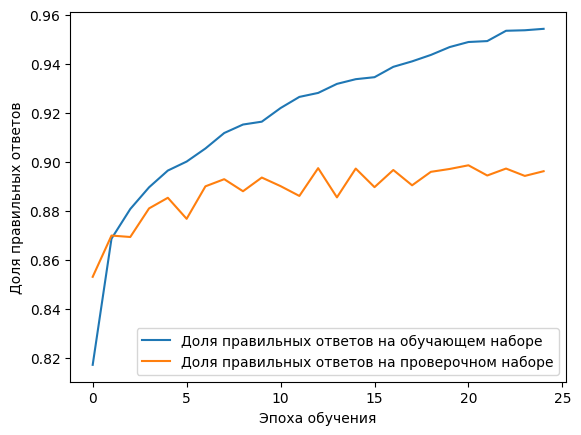

In [ ]:
plt.plot(history.history['accuracy'], 
         label='Доля правильных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля правильных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля правильных ответов')
plt.legend()
plt.show()

### Момент переобучения

Примем, что переобучение происходит, когда разность между точностями на обучающем и проверочном наборах становится стабильно больше 0,02. Найдем эпоху перед этим моментом.

In [ ]:
last_epoch = len(history.history['accuracy'])
best_epoch = last_epoch
i = last_epoch
while i>=0:
    # print(i, '->', abs(history.history['val_accuracy'][i-1]-history.history['accuracy'][i-1]))
    if abs(history.history['val_accuracy'][i-1]-history.history['accuracy'][i-1])>=0.02:
        i = i-1
    else:
        best_epoch = i
        break
print(f'Момент переобучения - {best_epoch}')

Момент переобучения - 8


### Оценка качества обучения

Проверка качества работы на наборе данных для тестирования

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=1)
print("Доля правильных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

313/313 [==============================] - 2s 6ms/step - loss: 0.4259 - accuracy: 0.8876
Доля правильных ответов на тестовых данных, в процентах: 88.76


## Модель с обратной связью

monitor = 'accuracy' следим за параметром точности

patience = 3 если прошло 3 эпохи без улучшения, прекращаем обучение

restore_best_weights = True сохраняем не последние веса модели, а лучшие по параметру точности

In [ ]:
callbacks_list = [EarlyStopping(monitor='accuracy', patience=3, restore_best_weights=True),
                 ]

### Создаем сеть

Вновь создаем модель с теми же параметрами, что и раньше

In [ ]:
# Создаем последовательную модель
model_cb = Sequential()
# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model_cb.add(Dense(800, input_dim=784, activation="relu"))
# Добавляем слой для защиты от переобучения размером в 20%
model_cb.add(Dropout(0.2))
# Второй скрытый слой
model_cb.add(Dense(units=800, activation="relu")) 
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model_cb.add(Dense(10, activation="softmax"))


In [ ]:
model_cb.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

print(model_cb.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 800)               628000    
                                                                 
 dropout (Dropout)           (None, 800)               0         
                                                                 
 dense_4 (Dense)             (None, 800)               640800    
                                                                 
 dense_5 (Dense)             (None, 10)                8010      
                                                                 
Total params: 1,276,810
Trainable params: 1,276,810
Non-trainable params: 0
_________________________________________________________________
None


Запускаем обучение новой модели, добавив лист обратной связи

In [ ]:
history_cb = model_cb.fit(x_train, y_train,
            batch_size=100,
            epochs=50,
            callbacks=callbacks_list,
            verbose=1,
            validation_split=0.2)

Epoch 1/50
480/480 [==============================] - 19s 38ms/step - loss: 0.5061 - accuracy: 0.8170 - val_loss: 0.4815 - val_accuracy: 0.8341
Epoch 2/50
480/480 [==============================] - 16s 34ms/step - loss: 0.3804 - accuracy: 0.8604 - val_loss: 0.3762 - val_accuracy: 0.8596
Epoch 3/50
480/480 [==============================] - 17s 35ms/step - loss: 0.3483 - accuracy: 0.8707 - val_loss: 0.3368 - val_accuracy: 0.8793
Epoch 4/50
480/480 [==============================] - 16s 33ms/step - loss: 0.3257 - accuracy: 0.8788 - val_loss: 0.3509 - val_accuracy: 0.8740
Epoch 5/50
480/480 [==============================] - 16s 33ms/step - loss: 0.3116 - accuracy: 0.8833 - val_loss: 0.3323 - val_accuracy: 0.8787
Epoch 6/50
480/480 [==============================] - 16s 33ms/step - loss: 0.2936 - accuracy: 0.8893 - val_loss: 0.3215 - val_accuracy: 0.8828
Epoch 7/50
480/480 [==============================] - 24s 50ms/step - loss: 0.2839 - accuracy: 0.8924 - val_loss: 0.3123 - val_accuracy:

### Точность на обучающем и проверочном наборах

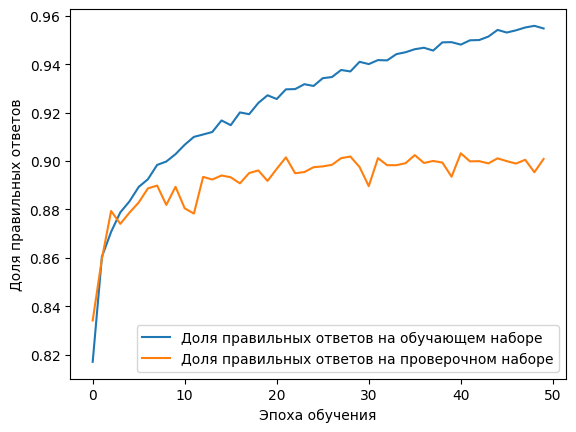

In [ ]:
plt.plot(history_cb.history['accuracy'],
         label='Доля правильных ответов на обучающем наборе')
plt.plot(history_cb.history['val_accuracy'],
         label='Доля правильных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля правильных ответов')
plt.legend()
plt.show()

### Оценка качества обучения

In [ ]:
scores = model_cb.evaluate(x_test, y_test, verbose=1)
print("Доля правильных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

313/313 [==============================] - 2s 5ms/step - loss: 0.4295 - accuracy: 0.8976
Доля правильных ответов на тестовых данных, в процентах: 89.76


## Используем сеть для распознавания предметов одежды

Можно ввести какой-либо номер  до 60 000

In [ ]:
n_test = 888

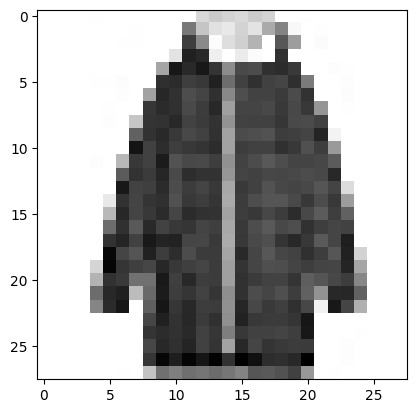

In [ ]:
plt.imshow(x_test[n_test].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

**Меняем размерность изображения и нормализуем его**

In [ ]:
x = x_test[n_test]
x = np.expand_dims(x, axis=0)

**Запускаем распознавание**

In [ ]:
prediction = model.predict(x)
prediction_cb = model_cb.predict(x)

1/1 [==============================] - 0s 95ms/step


**Печатаем результаты распознавания**

In [ ]:
prediction
prediction_cb

array([[8.9895429e-06, 6.7374563e-06, 9.8779658e-04, 2.8496400e-01,
        7.1403021e-01, 9.6468677e-13, 2.1132400e-06, 9.1654234e-13,
        1.4399455e-07, 1.0931306e-13]], dtype=float32)

**Преобразуем результаты из формата one hot encoding**
Выбираем максимальную вероятность из предсказания сети

Находим соответствующее название класса

In [ ]:
print("Название класса:", classes[np.argmax(prediction[0])])
print("Название класса:", classes[np.argmax(prediction_cb[0])])

Название класса: пальто
Название класса: пальто


**Печатаем правильный ответ из обучающего набора данных**

In [ ]:
label = np.argmax(y_test[n_test])
print("Номер класса:", label)
print("Название класса:", classes[label])

Номер класса: 4
Название класса: пальто
